In [1]:
#!pip install shap simplejson
import lightgbm as lgb
import pandas as pd
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import shap

import simplejson
import json

shap.initjs()

In [50]:
df.iloc[:1].to_dict()

{'id': {0: 105088},
 'rarity': {0: 'uncommon'},
 'generation': {0: 1},
 'mainClass': {0: 'Monk'},
 'subClass': {0: 'Wizard'},
 'statBoost1': {0: 'LCK'},
 'statBoost2': {0: 'END'},
 'profession': {0: 'fishing'},
 'summons': {0: 9},
 'maxSummons': {0: 10},
 'soldPrice': {0: 140.0},
 'timeStamp': {0: '2022-01-28 00:01:13'}}

In [55]:

import datetime

datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")




'2022-01-31 21:34:48'

In [42]:
df['profession'].unique()

array(['fishing', 'foraging', 'gardening', 'mining'], dtype=object)

In [57]:
df['statBoost1'].unique()



array(['LCK', 'AGI', 'DEX', 'WIS', 'STR', 'END', 'INT', 'VIT'],
      dtype=object)

In [28]:
def to_x_y(df):
    return df.drop(columns=['soldPrice', 'id']), df['soldPrice']


def train(X_train, X_test, y_train, y_test): 
    hyper_parameter = {
        'objective': 'regression_l1',
        'metric': ['l2','l1'],
        'boosting': 'gbdt',
        'min_data_in_leaf':20,
        'verbose': 1,
        'learning_rate': 0.01,   
        'num_boost_round': 1_000,
        'early_stopping_rounds':2000,
        'verbose_eval':500
    }
    
    pipe = make_pipeline(
        DateFeaturesExtractor(),
        ClassRankExtractor(),
        ToCategory(),
        LGBMRegressor(**hyper_parameter)
    )
    
    X_train_transformed = pipe[:-1].fit_transform(X_train)
    X_test_transformed = pipe[:-1].transform(X_test)
    
    cat_features = list(X_train_transformed.columns[X_train_transformed.dtypes=="category"])
    pipe[-1].fit(X_train_transformed, y_train, eval_set=(X_test_transformed, y_test), categorical_feature=cat_features)
    return pipe

In [29]:
X, y = to_x_y(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    
pipe = train(X_train, X_test, y_train, y_test)

[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] early_stopping_round is set=2000, early_stopping_rounds=2000 will be ignored. Current value: early_stopping_round=2000
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] num_iterations is set=1000, num_boost_round=1000 will be ignored. Current value: num_iterations=1000
[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if 

[179]	valid_0's l2: 1580.16	valid_0's l1: 18.7378
[180]	valid_0's l2: 1575.38	valid_0's l1: 18.7044
[181]	valid_0's l2: 1569.35	valid_0's l1: 18.6676
[182]	valid_0's l2: 1563.83	valid_0's l1: 18.6288
[183]	valid_0's l2: 1558.78	valid_0's l1: 18.5971
[184]	valid_0's l2: 1552.97	valid_0's l1: 18.561
[185]	valid_0's l2: 1547.86	valid_0's l1: 18.5262
[186]	valid_0's l2: 1543.28	valid_0's l1: 18.4955
[187]	valid_0's l2: 1538.76	valid_0's l1: 18.466
[188]	valid_0's l2: 1534.4	valid_0's l1: 18.4381
[189]	valid_0's l2: 1530.02	valid_0's l1: 18.4092
[190]	valid_0's l2: 1525.29	valid_0's l1: 18.3767
[191]	valid_0's l2: 1520.33	valid_0's l1: 18.3409
[192]	valid_0's l2: 1516.51	valid_0's l1: 18.3159
[193]	valid_0's l2: 1512.63	valid_0's l1: 18.2916
[194]	valid_0's l2: 1508.78	valid_0's l1: 18.264
[195]	valid_0's l2: 1504.92	valid_0's l1: 18.2399
[196]	valid_0's l2: 1500.89	valid_0's l1: 18.2146
[197]	valid_0's l2: 1496.89	valid_0's l1: 18.1889
[198]	valid_0's l2: 1493.18	valid_0's l1: 18.1643
[199

[354]	valid_0's l2: 1220.79	valid_0's l1: 16.0667
[355]	valid_0's l2: 1219.84	valid_0's l1: 16.0611
[356]	valid_0's l2: 1219.32	valid_0's l1: 16.055
[357]	valid_0's l2: 1218.61	valid_0's l1: 16.048
[358]	valid_0's l2: 1217.42	valid_0's l1: 16.0407
[359]	valid_0's l2: 1216.81	valid_0's l1: 16.0339
[360]	valid_0's l2: 1215.8	valid_0's l1: 16.0283
[361]	valid_0's l2: 1214.94	valid_0's l1: 16.0216
[362]	valid_0's l2: 1214.09	valid_0's l1: 16.0134
[363]	valid_0's l2: 1213.2	valid_0's l1: 16.0056
[364]	valid_0's l2: 1212.13	valid_0's l1: 15.9986
[365]	valid_0's l2: 1210.76	valid_0's l1: 15.9918
[366]	valid_0's l2: 1209.25	valid_0's l1: 15.9833
[367]	valid_0's l2: 1208.5	valid_0's l1: 15.9784
[368]	valid_0's l2: 1207.76	valid_0's l1: 15.9734
[369]	valid_0's l2: 1207.28	valid_0's l1: 15.9663
[370]	valid_0's l2: 1206.49	valid_0's l1: 15.9619
[371]	valid_0's l2: 1205.66	valid_0's l1: 15.9558
[372]	valid_0's l2: 1204.89	valid_0's l1: 15.9504
[373]	valid_0's l2: 1204.4	valid_0's l1: 15.9431
[374]	

[581]	valid_0's l2: 1105.31	valid_0's l1: 15.1647
[582]	valid_0's l2: 1105.19	valid_0's l1: 15.1626
[583]	valid_0's l2: 1105.08	valid_0's l1: 15.162
[584]	valid_0's l2: 1104.99	valid_0's l1: 15.1603
[585]	valid_0's l2: 1104.89	valid_0's l1: 15.1591
[586]	valid_0's l2: 1104.18	valid_0's l1: 15.1559
[587]	valid_0's l2: 1104.07	valid_0's l1: 15.1549
[588]	valid_0's l2: 1103.98	valid_0's l1: 15.1539
[589]	valid_0's l2: 1103.83	valid_0's l1: 15.1529
[590]	valid_0's l2: 1103.72	valid_0's l1: 15.1516
[591]	valid_0's l2: 1103.61	valid_0's l1: 15.1505
[592]	valid_0's l2: 1103.53	valid_0's l1: 15.1502
[593]	valid_0's l2: 1103.46	valid_0's l1: 15.1497
[594]	valid_0's l2: 1103.4	valid_0's l1: 15.1486
[595]	valid_0's l2: 1103.3	valid_0's l1: 15.1473
[596]	valid_0's l2: 1103.24	valid_0's l1: 15.1464
[597]	valid_0's l2: 1103.14	valid_0's l1: 15.1454
[598]	valid_0's l2: 1103.07	valid_0's l1: 15.1442
[599]	valid_0's l2: 1102.94	valid_0's l1: 15.1422
[600]	valid_0's l2: 1102.88	valid_0's l1: 15.1413
[60

[815]	valid_0's l2: 1073.28	valid_0's l1: 14.9223
[816]	valid_0's l2: 1073.19	valid_0's l1: 14.9207
[817]	valid_0's l2: 1073.2	valid_0's l1: 14.9204
[818]	valid_0's l2: 1073.13	valid_0's l1: 14.9198
[819]	valid_0's l2: 1073.06	valid_0's l1: 14.9182
[820]	valid_0's l2: 1073.06	valid_0's l1: 14.9173
[821]	valid_0's l2: 1073.01	valid_0's l1: 14.9167
[822]	valid_0's l2: 1073.01	valid_0's l1: 14.9157
[823]	valid_0's l2: 1073	valid_0's l1: 14.9151
[824]	valid_0's l2: 1073	valid_0's l1: 14.9145
[825]	valid_0's l2: 1072.97	valid_0's l1: 14.9133
[826]	valid_0's l2: 1072.95	valid_0's l1: 14.9133
[827]	valid_0's l2: 1072.94	valid_0's l1: 14.9144
[828]	valid_0's l2: 1072.68	valid_0's l1: 14.9134
[829]	valid_0's l2: 1072.53	valid_0's l1: 14.9129
[830]	valid_0's l2: 1072.3	valid_0's l1: 14.9119
[831]	valid_0's l2: 1072.14	valid_0's l1: 14.9114
[832]	valid_0's l2: 1072.12	valid_0's l1: 14.9111
[833]	valid_0's l2: 1072.11	valid_0's l1: 14.9101
[834]	valid_0's l2: 1072.11	valid_0's l1: 14.9091
[835]	va

[990]	valid_0's l2: 1065.67	valid_0's l1: 14.8594
[991]	valid_0's l2: 1065.68	valid_0's l1: 14.8598
[992]	valid_0's l2: 1065.66	valid_0's l1: 14.8596
[993]	valid_0's l2: 1065.65	valid_0's l1: 14.8594
[994]	valid_0's l2: 1065.59	valid_0's l1: 14.8592
[995]	valid_0's l2: 1065.6	valid_0's l1: 14.8589
[996]	valid_0's l2: 1065.54	valid_0's l1: 14.8582
[997]	valid_0's l2: 1065.42	valid_0's l1: 14.8583
[998]	valid_0's l2: 1065.38	valid_0's l1: 14.8584
[999]	valid_0's l2: 1065.39	valid_0's l1: 14.858
[1000]	valid_0's l2: 1065.38	valid_0's l1: 14.858


In [30]:
n_quant = 5
df_cv = (
    X_test
        .merge(y_test, left_index=True, right_index=True)
        .assign(predictedSoldPrice=pipe.predict(X_test),
                soldPrice_quantile = lambda X: pd.qcut(X['soldPrice'], n_quant, labels=range(1,n_quant+1)).astype(int),
                predictedSoldPrice_quantile = lambda X: pd.qcut(X['predictedSoldPrice'], n_quant, labels=range(1,n_quant+1)).astype(int)
               )
)
confusion_matrix = pd.crosstab(df_cv['soldPrice_quantile'], df_cv['predictedSoldPrice_quantile'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    1    2    3    4    5
Actual                            
1          242   64   15    4    1
2           69  184   56    8    0
3            6   54  174   79   10
4            0   13   69  174   57
5            0    1    3   51  249


NameError: name '__file__' is not defined

In [31]:
import joblib

joblib.dump(pipe, '../data/model.joblib')



['../data/model.joblib']

[(40.0, 476.9593850058911)]

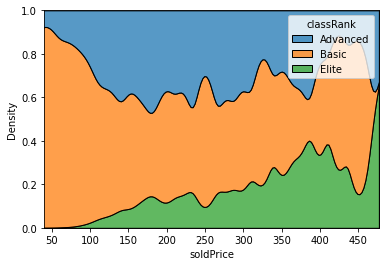

In [ ]:
g = sns.kdeplot(data=df, x="soldPrice", hue="classRank", multiple="fill")
g.set(xlim=(40,None))

[(40.0, 476.9593850058911)]

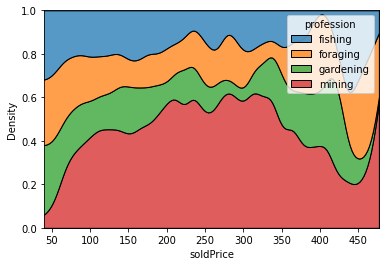

In [ ]:
g = sns.kdeplot(data=df, x="soldPrice", hue="profession", multiple="fill")
g.set(xlim=(40,None))

In [ ]:
df

,id,rarity,generation,mainClass,subClass,statBoost1,statBoost2,profession,summons,maxSummons,soldPrice,timeStamp,classRank,buyWeekDay,buyHour
0,105088,uncommon,1,Monk,Wizard,LCK,END,fishing,9,10,140.00,2022-01-28 00:01:13,Basic,4,0
1,105200,common,2,Monk,Priest,AGI,AGI,fishing,5,5,57.99,2022-01-28 00:01:03,Basic,4,0
2,105742,uncommon,1,Pirate,Pirate,LCK,VIT,fishing,9,10,114.00,2022-01-28 00:00:36,Basic,4,0
3,104411,uncommon,1,Summoner,Wizard,LCK,WIS,foraging,4,5,250.00,2022-01-28 00:00:15,Advanced,4,0
4,85785,uncommon,1,Ninja,Knight,DEX,DEX,fishing,4,5,250.00,2022-01-27 23:59:56,Advanced,3,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,89158,common,3,Warrior,Priest,INT,LCK,mining,2,4,83.63,2022-01-21 13:19:07,Basic,4,13
7996,79065,common,3,Pirate,Warrior,LCK,VIT,mining,8,8,90.00,2022-01-21 13:19:03,Basic,4,13
7997,68647,common,3,Archer,Priest,DEX,VIT,mining,5,5,90.00,2022-01-21 13:18:26,Basic,4,13
7998,94398,common,4,Paladin,Archer,STR,END,mining,0,1,199.00,2022-01-21 13:17:56,Advanced,4,13


In [ ]:
df_xtrain, df_xcv, df_ytrain, df_ycv = train_test_split(df_x, df_y, test_size=0.2, random_state=42)    
 
cat_features =  list(df_xtrain.columns[df_xtrain.dtypes=="category"])
 
train_data = lgb.Dataset(df_xtrain, label=df_ytrain, categorical_feature=cat_features, free_raw_data=False)
cv_data = lgb.Dataset(df_xcv, label=df_ycv, categorical_feature=cat_features, free_raw_data=False)

In [ ]:
params = {
    'objective': 'regression_l1',
    'metric': ['l2','l1'],
    'boosting': 'gbdt',
    'min_data_in_leaf':20,
    'verbose': 1,
    'learning_rate':0.01
}
 
model = lgb.train(params, train_data, valid_sets=cv_data, num_boost_round=10000, early_stopping_rounds=2000, verbose_eval=500)

Using categorical_feature in Dataset.
categorical_feature in param dict is overridden.


Training until validation scores don't improve for 2000 rounds.
[500]	valid_0's l1: 15.273	valid_0's l2: 1101.14
[1000]	valid_0's l1: 14.7808	valid_0's l2: 1042.46
[1500]	valid_0's l1: 14.6704	valid_0's l2: 1024.84
[2000]	valid_0's l1: 14.5729	valid_0's l2: 1008.19
[2500]	valid_0's l1: 14.5509	valid_0's l2: 1004.46
[3000]	valid_0's l1: 14.537	valid_0's l2: 1002.53
[3500]	valid_0's l1: 14.543	valid_0's l2: 1001.05
[4000]	valid_0's l1: 14.5011	valid_0's l2: 992.528
[4500]	valid_0's l1: 14.418	valid_0's l2: 976.569
[5000]	valid_0's l1: 14.3915	valid_0's l2: 971.099
[5500]	valid_0's l1: 14.3712	valid_0's l2: 966.604
[6000]	valid_0's l1: 14.3612	valid_0's l2: 963.24
[6500]	valid_0's l1: 14.3195	valid_0's l2: 953.671
[7000]	valid_0's l1: 14.2968	valid_0's l2: 946.621
[7500]	valid_0's l1: 14.2482	valid_0's l2: 933.456
[8000]	valid_0's l1: 14.1559	valid_0's l2: 910.692
[8500]	valid_0's l1: 14.1326	valid_0's l2: 903.712
[9000]	valid_0's l1: 14.1231	valid_0's l2: 902.146
[9500]	valid_0's l1: 14.

In [ ]:
df_cv = df_xcv.merge(df_ycv, left_index=True, right_index=True)

df_cv['predictedSoldPrice'] = model.predict(df_xcv)

n_quant = 5
df_cv['soldPrice_quantile'] = pd.qcut(df_cv.soldPrice, n_quant, labels=range(1,n_quant+1)).astype(int)
df_cv['predictedSoldPrice_quantile'] = pd.qcut(df_cv.predictedSoldPrice, n_quant, labels=range(1,n_quant+1)).astype(int)


In [ ]:
df_cv

,id,rarity,generation,mainClass,subClass,statBoost1,statBoost2,profession,summons,maxSummons,classRank,buyWeekDay,buyHour,soldPrice,predictedSoldPrice,soldPrice_quantile,predictedSoldPrice_quantile
2145,102693,uncommon,1,Wizard,Pirate,STR,VIT,gardening,8,10,Basic,2,11,83.00,104.594229,4,5
7703,94231,common,1,Knight,Priest,END,END,foraging,7,10,Basic,4,19,60.00,78.478806,3,4
3946,95074,common,3,Wizard,Thief,INT,LCK,gardening,4,4,Basic,0,22,50.00,56.558640,2,2
7778,99385,common,1,Archer,Wizard,STR,INT,fishing,5,10,Basic,4,17,70.00,64.026900,3,3
3055,103859,uncommon,1,Monk,Priest,VIT,INT,mining,7,10,Basic,1,15,95.00,136.734811,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,38848,common,3,Ninja,Knight,AGI,WIS,gardening,0,5,Advanced,3,15,60.00,59.375578,3,3
1436,94254,common,4,DarkKnight,Thief,AGI,LCK,mining,0,1,Advanced,3,1,90.00,111.732225,4,5
4697,102190,common,2,Wizard,Wizard,END,WIS,foraging,1,1,Basic,0,4,44.50,45.721647,1,1
7912,98177,common,3,Summoner,Pirate,END,LCK,gardening,1,1,Advanced,4,15,51.89,53.988994,2,2


(-22.395, 472.495, -15.477212532365352, 325.6850910030996)

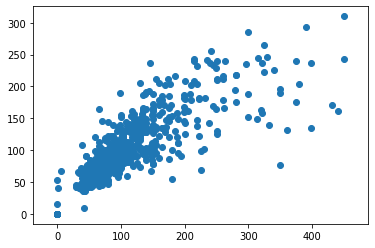

In [ ]:
plt.scatter(df_cv.soldPrice, df_cv.predictedSoldPrice)
plt.axis('equal')
#plt.xlim([30,200])
#plt.ylim([30,200])


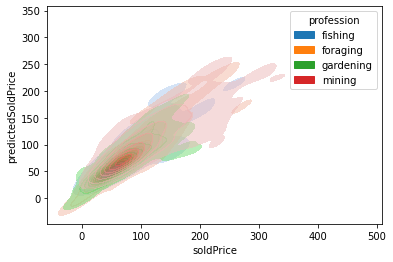

In [ ]:
sns.kdeplot(data=df_cv, x='soldPrice', y='predictedSoldPrice', hue="profession", fill=True, alpha=0.5)

Predicted    1    2    3    4    5
Actual                            
1          243   63   16    3    1
2           70  181   57    9    0
3            4   60  173   79    7
4            0   11   68  177   57
5            0    1    3   48  252


In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df_xcv)

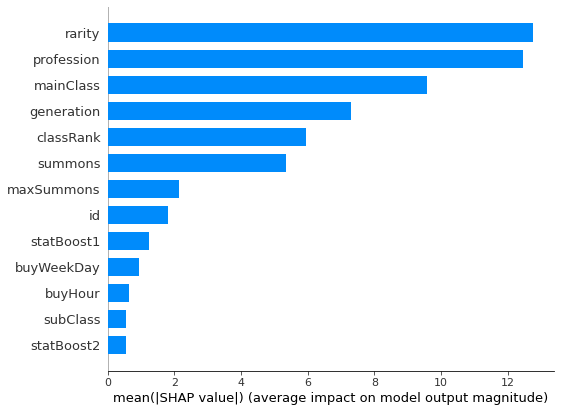

In [ ]:
shap.summary_plot(shap_values, df_xcv, plot_type="bar")

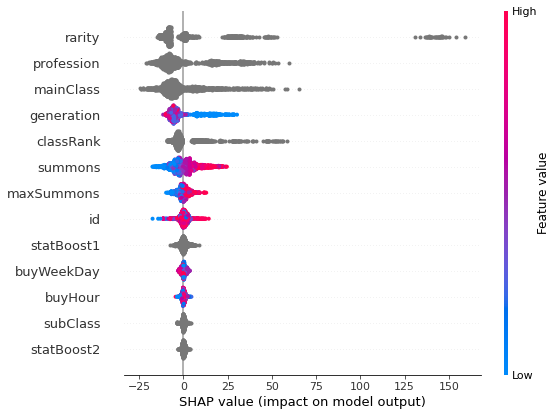

In [ ]:
shap.summary_plot(shap_values, df_xcv)

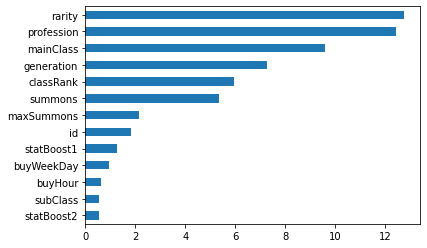

In [ ]:
# DONE: feature importance
pd.DataFrame(shap_values,columns=df_xcv.columns).abs().mean().sort_values(ascending=True).plot.barh()

[[73604 'common' 3 'Warrior' 'Thief' 'VIT' 'INT' 'mining' 4 6 'Basic' 1
  22 66.0 85.30513226964696 3 4]
 [73604 'common' 3 'Warrior' 'Thief' 'VIT' 'INT' 'mining' 4 6 'Basic' 2 9
  77.99 85.21959602171646 4 4]]


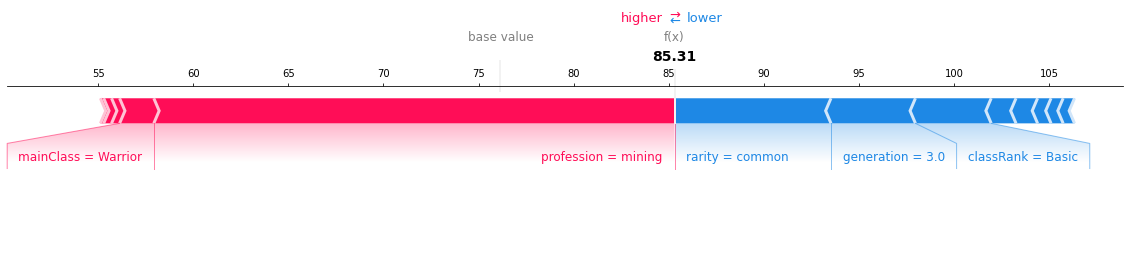

In [ ]:
n_check = 192
print(df_cv[df_cv.id == df_xcv.iloc[n_check,:]['id']].values)
shap.force_plot(explainer.expected_value, shap_values[n_check], df_xcv.iloc[n_check,:], matplotlib=True, plot_cmap=['#009C44','#B4202A'])

In [ ]:
df_cv

,id,rarity,generation,mainClass,subClass,statBoost1,statBoost2,profession,summons,maxSummons,classRank,buyWeekDay,buyHour,soldPrice,predictedSoldPrice,soldPrice_quantile,predictedSoldPrice_quantile
2145,102693,uncommon,1,Wizard,Pirate,STR,VIT,gardening,8,10,Basic,2,11,83.00,104.594229,4,5
7703,94231,common,1,Knight,Priest,END,END,foraging,7,10,Basic,4,19,60.00,78.478806,3,4
3946,95074,common,3,Wizard,Thief,INT,LCK,gardening,4,4,Basic,0,22,50.00,56.558640,2,2
7778,99385,common,1,Archer,Wizard,STR,INT,fishing,5,10,Basic,4,17,70.00,64.026900,3,3
3055,103859,uncommon,1,Monk,Priest,VIT,INT,mining,7,10,Basic,1,15,95.00,136.734811,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,38848,common,3,Ninja,Knight,AGI,WIS,gardening,0,5,Advanced,3,15,60.00,59.375578,3,3
1436,94254,common,4,DarkKnight,Thief,AGI,LCK,mining,0,1,Advanced,3,1,90.00,111.732225,4,5
4697,102190,common,2,Wizard,Wizard,END,WIS,foraging,1,1,Basic,0,4,44.50,45.721647,1,1
7912,98177,common,3,Summoner,Pirate,END,LCK,gardening,1,1,Advanced,4,15,51.89,53.988994,2,2


In [ ]:
df_shap = pd.DataFrame(shap_values,columns=df_xcv.columns)

In [ ]:
df_shap

,id,rarity,generation,mainClass,subClass,statBoost1,statBoost2,profession,summons,maxSummons,classRank,buyWeekDay,buyHour
0,3.596821,1.716111,18.888490,-3.069410,-0.613943,-0.296443,-0.329500,-3.151543,13.097684,1.477146,-3.023601,0.952019,-0.798036
1,1.342259,-9.336963,17.405273,0.041169,-0.512025,2.066335,0.630840,-18.676466,11.764024,2.560679,-2.671790,-2.205994,-0.076969
2,0.739207,-8.197607,-5.306034,-2.041264,0.084854,-0.660175,-0.051232,-3.132804,0.150051,-0.541919,-2.162821,0.688674,0.841275
3,8.144696,-8.950272,14.838113,-6.330983,-0.702502,-0.596119,-0.792313,-11.983333,0.132631,-0.497545,-3.145132,-2.054761,-0.184015
4,7.443259,-0.544504,25.541620,-17.234238,-0.221777,0.800516,-0.472339,28.540566,11.618297,6.961262,-2.984517,0.652759,0.485471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,2.111757,-12.316309,-2.680230,6.969979,0.414413,-0.210076,-0.155861,-8.875982,-10.572196,1.382340,5.543458,1.396821,0.219028
1579,-0.622462,-9.311667,-4.364354,19.345791,0.566312,-1.803530,0.377599,33.326365,-9.255442,-2.540531,9.986792,0.867280,-0.988362
1580,-0.479445,-8.035809,-5.959430,-4.779761,0.324144,-0.103456,0.164931,-6.154291,-2.417577,-1.367818,-1.869510,0.753511,-0.502276
1581,0.596562,-13.412282,-6.025655,7.469800,-0.420341,0.635470,-0.021400,-6.682483,-4.505935,-2.833092,5.693444,-2.443497,-0.210030


In [ ]:
df_shap.sum(axis=1) + explainer.expected_value

0       104.594229
1        78.478806
2        56.558640
3        64.026900
4       136.734811
           ...    
1578     59.375578
1579    111.732225
1580     45.721647
1581     53.988994
1582     60.890083
Length: 1583, dtype: float64

In [ ]:
df_ycv

2145    83.00
7703    60.00
3946    50.00
7778    70.00
3055    95.00
        ...  
627     60.00
1436    90.00
4697    44.50
7912    51.89
3338    59.00
Name: soldPrice, Length: 1583, dtype: float64

In [ ]:
pd.get_dummies(df_cv).groupby('predictedSoldPrice_quantile').mean().reset_index()#.plot.bar(x='predictedSoldPrice_quantile',y=['rarity_common','rarity_rare'])

,predictedSoldPrice_quantile,id,generation,summons,maxSummons,buyWeekDay,buyHour,soldPrice,predictedSoldPrice,soldPrice_quantile,rarity_common,rarity_legendary,rarity_mythic,rarity_rare,rarity_uncommon,mainClass_Archer,mainClass_DarkKnight,mainClass_Dragoon,mainClass_Knight,mainClass_Monk,mainClass_Ninja,mainClass_Paladin,mainClass_Pirate,mainClass_Priest,mainClass_Sage,mainClass_Summoner,mainClass_Thief,mainClass_Warrior,mainClass_Wizard,subClass_Archer,subClass_DarkKnight,subClass_Dragoon,subClass_Knight,subClass_Monk,subClass_Ninja,subClass_Paladin,subClass_Pirate,subClass_Priest,subClass_Sage,subClass_Summoner,subClass_Thief,subClass_Warrior,subClass_Wizard,statBoost1_AGI,statBoost1_DEX,statBoost1_END,statBoost1_INT,statBoost1_LCK,statBoost1_STR,statBoost1_VIT,statBoost1_WIS,statBoost2_AGI,statBoost2_DEX,statBoost2_END,statBoost2_INT,statBoost2_LCK,statBoost2_STR,statBoost2_VIT,statBoost2_WIS,profession_fishing,profession_foraging,profession_gardening,profession_mining,classRank_Advanced,classRank_Basic,classRank_Elite
0,1,83363.246057,2.656151,3.738170,4.668770,3.271293,12.022082,42.057129,41.915062,1.239748,0.867508,0.000000,0.000000,0.000000,0.132492,0.078864,0.012618,0.000000,0.195584,0.129338,0.000000,0.003155,0.135647,0.082019,0.000000,0.000000,0.113565,0.173502,0.075710,0.132492,0.018927,0.0,0.072555,0.123028,0.025237,0.003155,0.157729,0.104101,0.000000,0.009464,0.138801,0.094637,0.119874,0.097792,0.157729,0.135647,0.119874,0.135647,0.119874,0.148265,0.085174,0.145110,0.104101,0.129338,0.110410,0.104101,0.160883,0.116719,0.129338,0.315457,0.299685,0.384858,0.000000,0.015773,0.984227,0.00000
1,2,74635.155063,2.487342,3.939873,5.455696,3.069620,13.079114,52.998038,52.838041,2.079114,0.702532,0.000000,0.000000,0.000000,0.297468,0.158228,0.085443,0.000000,0.088608,0.088608,0.018987,0.031646,0.129747,0.113924,0.000000,0.025316,0.069620,0.072785,0.117089,0.107595,0.015823,0.0,0.120253,0.126582,0.006329,0.022152,0.091772,0.180380,0.003165,0.028481,0.110759,0.091772,0.094937,0.142405,0.072785,0.126582,0.113924,0.126582,0.120253,0.126582,0.170886,0.151899,0.104430,0.123418,0.123418,0.136076,0.123418,0.142405,0.094937,0.329114,0.335443,0.316456,0.018987,0.161392,0.838608,0.00000
2,3,78201.675079,2.523659,3.593060,5.003155,3.208202,13.261830,64.847129,64.765354,2.940063,0.627760,0.000000,0.000000,0.044164,0.328076,0.141956,0.041009,0.000000,0.025237,0.063091,0.059937,0.025237,0.088328,0.151420,0.000000,0.059937,0.154574,0.028391,0.160883,0.085174,0.009464,0.0,0.138801,0.107256,0.003155,0.015773,0.129338,0.129338,0.000000,0.028391,0.104101,0.132492,0.116719,0.097792,0.154574,0.119874,0.160883,0.129338,0.119874,0.119874,0.097792,0.141956,0.104101,0.141956,0.126183,0.132492,0.100946,0.135647,0.116719,0.223975,0.205047,0.164038,0.406940,0.186120,0.813880,0.00000
3,4,78985.424051,2.009494,4.639241,6.879747,2.851266,12.832278,85.726519,83.365692,3.835443,0.515823,0.000000,0.000000,0.196203,0.287975,0.094937,0.022152,0.000000,0.082278,0.063291,0.056962,0.056962,0.107595,0.072785,0.000000,0.060127,0.123418,0.177215,0.082278,0.136076,0.006329,0.0,0.113924,0.098101,0.015823,0.012658,0.142405,0.101266,0.000000,0.018987,0.126582,0.126582,0.101266,0.148734,0.107595,0.113924,0.110759,0.120253,0.123418,0.123418,0.151899,0.136076,0.142405,0.110759,0.113924,0.132911,0.123418,0.094937,0.145570,0.227848,0.202532,0.237342,0.332278,0.196203,0.803797,0.00000
4,5,81802.599369,2.290221,4.015773,5.858044,2.769716,12.290221,159.419022,145.546908,4.753943,0.347003,0.107256,0.015773,0.268139,0.261830,0.050473,0.100946,0.056782,0.119874,0.041009,0.063091,0.138801,0.047319,0.037855,0.053628,0.047319,0.063091,0.132492,0.047319,0.097792,0.022082,0.0,0.126183,0.110410,0.015773,0.047319,0.145110,0.107256,0.000000,0.009464,0.097792,0.113565,0.107256,0.135647,0.107256,0.157729,0.107256,0.123028,0.157729,0.123028,0.088328,0.151420,0.116719,0.123028,0.110410,0.138801,0.113565,0.138801,0.107256,0.148265,0.157729,0.138801,0.555205,0.350158,0.539432,0.11041


In [ ]:
pd.io.json._json.loads = lambda s, *a, **kw: json.loads(s)

# monkeypatch using faster simplejson module

pd.io.json._json.loads = lambda s, *a, **kw: simplejson.loads(s)

# normalising (unnesting) at the same time (for nested jsons)
pd.io.json._json.loads = lambda s, *a, **kw: pd.json_normalize(simplejson.loads(s))

In [ ]:
#pd.DataFrame(pd.read_json('auction.json',orient='records')['auctions'][0])['tokenId'][0]